In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torch.optim as optim
from sklearn.metrics import r2_score


In [3]:
X_numpy, y_numpy= datasets.make_regression(n_samples=100, n_features=1,noise=20,random_state=1)

In [4]:
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)

In [15]:
y.shape

torch.Size([100, 1])

In [16]:
n_samples, n_features = X.shape

In [17]:
X.shape

torch.Size([100, 1])

In [6]:
input_size=n_features
output_size=1

In [7]:
model= nn.Linear(input_size,1) #predict a value

In [8]:
learning_rate=.01
num_epoch=100


In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
total_loss = 0.0
num_samples = 0
true_values = []
predicted_values = []

In [11]:
for epoch in range(num_epoch):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    total_loss += loss.item()
    num_samples += X.size(0)
    
    true_values.extend(y.tolist())  # For r2_scroe: Assuming y is a tensor
    predicted_values.extend(y_pred.tolist())  # For r2_scroe: Assuming y_pred is a tensor

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1},\tMSE Loss = {total_loss/num_samples:.4f}')

# Calculate the final MSE loss after all epochs
final_mse = total_loss/num_samples
r2 = r2_score(true_values, predicted_values)

print(f'Final MSE Loss: {final_mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')


epoch: 10,	MSE Loss = 49.6819
epoch: 20,	MSE Loss = 43.3000
epoch: 30,	MSE Loss = 38.0973
epoch: 40,	MSE Loss = 33.8268
epoch: 50,	MSE Loss = 30.2972
epoch: 60,	MSE Loss = 27.3595
epoch: 70,	MSE Loss = 24.8975
epoch: 80,	MSE Loss = 22.8199
epoch: 90,	MSE Loss = 21.0547
epoch: 100,	MSE Loss = 19.5447
Final MSE Loss: 19.5447
R-squared (R2): 0.6549


In [12]:
predicted = model(X).detach().numpy()

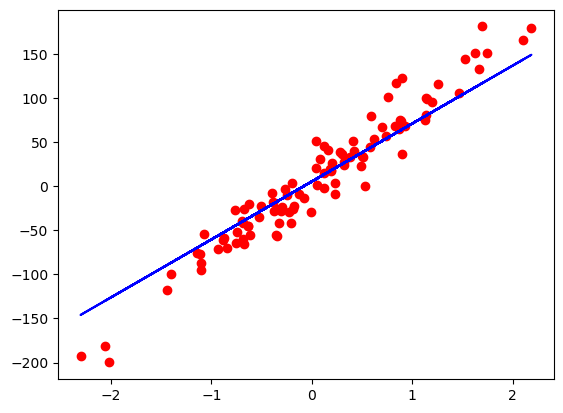

In [13]:
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()